In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
dataset = pd.read_csv('info.csv',encoding='ISO-8859-1')

In [3]:
dataset

,mac_address,date,day,hour
0,6c:a6:04:8c:a7:16,2022-4-13,Wed,9
1,dc:9b:d6:4e:c8:e0,2022-4-13,Wed,9
2,6c:a6:04:8c:a7:16,2022-4-13,Wed,10
3,6c:a6:04:8c:a7:16,2022-4-13,Wed,10
4,22:a5:89:b3:9e:fb,2022-4-13,Wed,10
...,...,...,...,...
143577,a0:51:0b:4d:3e:ab,2022-5-3,Tue,10
143578,fe:c9:62:c2:d5:ad,2022-5-3,Tue,10
143579,4e:ac:e3:4b:70:5b,2022-5-3,Tue,10
143580,34:de:1a:98:af:8a,2022-5-3,Tue,10


In [4]:
macs_13_04_10h = dataset.loc[lambda dataset: dataset['hour'] == 10]
macs_13_04_10h.head(30)

,mac_address,date,day,hour
2,6c:a6:04:8c:a7:16,2022-4-13,Wed,10
3,6c:a6:04:8c:a7:16,2022-4-13,Wed,10
4,22:a5:89:b3:9e:fb,2022-4-13,Wed,10
5,6c:a6:04:8c:a7:16,2022-4-13,Wed,10
6,4a:e5:a1:c8:63:97,2022-4-13,Wed,10
7,6c:a6:04:8c:a7:16,2022-4-13,Wed,10
8,6c:a6:04:8c:a7:16,2022-4-13,Wed,10
9,6c:a6:04:8c:a7:16,2022-4-13,Wed,10
10,4a:e5:a1:c8:63:97,2022-4-13,Wed,10
11,da:a1:19:80:9d:78,2022-4-13,Wed,10


In [5]:
dataset.isnull().sum()

mac_address    0
date           0
day            0
hour           0
dtype: int64

In [6]:
dataset.nunique()

mac_address    111629
date               21
day                 7
hour               24
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143582 entries, 0 to 143581
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   mac_address  143582 non-null  object
 1   date         143582 non-null  object
 2   day          143582 non-null  object
 3   hour         143582 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 4.4+ MB


In [8]:
dataset.describe(include=object)

,mac_address,date,day
count,143582,143582,143582
unique,111629,21,7
top,34:de:1a:98:af:8a,2022-4-22,Fri
freq,5830,13040,29807


## Eliminar os mac adresses repetidos em cada hora do dia

In [9]:
dataset = dataset.drop_duplicates()
dataset

,mac_address,date,day,hour
0,6c:a6:04:8c:a7:16,2022-4-13,Wed,9
1,dc:9b:d6:4e:c8:e0,2022-4-13,Wed,9
2,6c:a6:04:8c:a7:16,2022-4-13,Wed,10
4,22:a5:89:b3:9e:fb,2022-4-13,Wed,10
6,4a:e5:a1:c8:63:97,2022-4-13,Wed,10
...,...,...,...,...
143576,96:34:eb:b1:de:29,2022-5-3,Tue,10
143577,a0:51:0b:4d:3e:ab,2022-5-3,Tue,10
143578,fe:c9:62:c2:d5:ad,2022-5-3,Tue,10
143579,4e:ac:e3:4b:70:5b,2022-5-3,Tue,10


In [10]:
macs_13_04_10h = dataset.loc[lambda dataset: dataset['hour'] == 10]
macs_13_04_10h.head(30)

,mac_address,date,day,hour
2,6c:a6:04:8c:a7:16,2022-4-13,Wed,10
4,22:a5:89:b3:9e:fb,2022-4-13,Wed,10
6,4a:e5:a1:c8:63:97,2022-4-13,Wed,10
11,da:a1:19:80:9d:78,2022-4-13,Wed,10
14,dc:9b:d6:4e:c8:e0,2022-4-13,Wed,10
18,80:a5:89:b3:9e:fb,2022-4-13,Wed,10
19,de:2f:d9:df:9a:69,2022-4-13,Wed,10
20,a6:e8:fc:5e:a3:61,2022-4-13,Wed,10
21,fe:80:10:63:c9:da,2022-4-13,Wed,10
22,36:d0:ef:b8:e9:98,2022-4-13,Wed,10


# Contar quantos aparelhos diferentes apareceram em cada hora

In [11]:
unique_macs = {}
np_dataset = dataset.values[:,:]

for line in np_dataset:
    key = line[1] + '|' + str(line[3])
    unique_macs.setdefault(key,0)
    unique_macs[key] += 1
    
print(unique_macs.values())

dict_values([2, 28, 51, 64, 233, 112, 360, 872, 752, 664, 714, 586, 512, 501, 379, 89, 5, 2, 3, 1, 14, 1, 20, 15, 79, 94, 206, 296, 356, 292, 275, 172, 149, 319, 278, 637, 633, 723, 701, 73, 26, 14, 9, 18, 14, 1, 6, 9, 7, 19, 42, 76, 123, 243, 536, 630, 264, 102, 224, 594, 368, 156, 605, 78, 6, 2, 1, 1, 7, 4, 5, 9, 19, 36, 64, 74, 21, 30, 63, 122, 83, 73, 73, 241, 570, 766, 839, 21, 15, 5, 2, 8, 3, 4, 12, 22, 8, 18, 17, 6, 5, 1, 3, 3, 1, 8, 71, 182, 232, 269, 409, 24, 3, 2, 6, 4, 1, 3, 10, 19, 24, 25, 17, 81, 140, 439, 563, 458, 265, 145, 308, 970, 992, 734, 142, 13, 17, 7, 3, 4, 3, 58, 246, 210, 579, 322, 460, 569, 615, 618, 688, 859, 832, 536, 339, 661, 39, 222, 945, 25, 32, 16, 5, 8, 10, 19, 57, 373, 747, 424, 629, 493, 439, 356, 565, 848, 882, 853, 713, 644, 27, 630, 54, 24, 23, 30, 29, 42, 39, 19, 32, 241, 228, 456, 608, 628, 377, 593, 931, 1045, 980, 777, 579, 453, 713, 522, 21, 2, 3, 1, 2, 4, 15, 27, 159, 484, 307, 633, 490, 925, 920, 815, 924, 1062, 964, 720, 506, 238, 439, 436

# Adicionar a contagem dos mac addresses ao dataset

In [12]:
for i in range(len(np_dataset)):
    key = np_dataset[i][1] + '|' + str(np_dataset[i][3])
    np_dataset[i] = [unique_macs.get(key), np_dataset[i][1], np_dataset[i][2], np_dataset[i][3]]
    
columns = ['mac_count', 'date', 'day', 'hour']
dataset = pd.DataFrame(np_dataset, columns=columns)
dataset = dataset.drop_duplicates()
dataset['mac_count'] = dataset['mac_count'].astype('float32')
dataset

,mac_count,date,day,hour
0,2.0,2022-4-13,Wed,9
2,28.0,2022-4-13,Wed,10
30,51.0,2022-4-13,Wed,11
81,64.0,2022-4-13,Wed,12
145,233.0,2022-4-13,Wed,13
...,...,...,...,...
114982,4.0,2022-5-3,Tue,6
114986,5.0,2022-5-3,Tue,7
114991,22.0,2022-5-3,Tue,8
115013,134.0,2022-5-3,Tue,9


## Separar as informações da data e adicionar nova informação sobre a mesma

In [13]:
dataset.date = pd.to_datetime(dataset.date)
dataset['month'] = dataset.date.dt.month
dataset['day_number'] = dataset.date.dt.day
dataset.drop("date", axis=1, inplace=True)
dataset

,mac_count,day,hour,month,day_number
0,2.0,Wed,9,4,13
2,28.0,Wed,10,4,13
30,51.0,Wed,11,4,13
81,64.0,Wed,12,4,13
145,233.0,Wed,13,4,13
...,...,...,...,...,...
114982,4.0,Tue,6,5,3
114986,5.0,Tue,7,5,3
114991,22.0,Tue,8,5,3
115013,134.0,Tue,9,5,3


In [14]:
def daypart(h):
    if h >= 0 and h <= 8:
        return "dawn"
    elif h > 8 and h < 12:
        return "morning"
    elif h >= 12 and h < 20:
        return "afternoon"
    else:
        return "night"
    
dataset['day_part'] = dataset['hour'].apply(daypart) 
dataset

,mac_count,day,hour,month,day_number,day_part
0,2.0,Wed,9,4,13,morning
2,28.0,Wed,10,4,13,morning
30,51.0,Wed,11,4,13,morning
81,64.0,Wed,12,4,13,afternoon
145,233.0,Wed,13,4,13,afternoon
...,...,...,...,...,...,...
114982,4.0,Tue,6,5,3,dawn
114986,5.0,Tue,7,5,3,dawn
114991,22.0,Tue,8,5,3,dawn
115013,134.0,Tue,9,5,3,morning


In [15]:
dataset['is_holiday_eve'] = 0
#sexta feira santa
dataset.loc[(dataset['day_number'] == 15) & (dataset['month'] == 4), 'is_holiday_eve'] = 1
#pascoa
dataset.loc[(dataset['day_number'] == 17) & (dataset['month'] == 4), 'is_holiday_eve'] = 1
#25 de abril
dataset.loc[(dataset['day_number'] == 25) & (dataset['month'] == 4), 'is_holiday_eve'] = 1
#dia do trabalhador
dataset.loc[(dataset['day_number'] == 1) & (dataset['month'] == 5), 'is_holiday_eve'] = 1
print(dataset.loc[dataset['day_number'] == 1])

        mac_count  day hour  month  day_number   day_part  is_holiday_eve
105438      873.0  Sun    0      5           1       dawn               1
106311      390.0  Sun    1      5           1       dawn               1
106701       16.0  Sun    2      5           1       dawn               1
106717        2.0  Sun    3      5           1       dawn               1
106719        7.0  Sun    4      5           1       dawn               1
106726        1.0  Sun    5      5           1       dawn               1
106727        1.0  Sun    6      5           1       dawn               1
106728        3.0  Sun    7      5           1       dawn               1
106731        1.0  Sun    8      5           1       dawn               1
106732        1.0  Sun    9      5           1    morning               1
106733        3.0  Sun   10      5           1    morning               1
106736       10.0  Sun   11      5           1    morning               1
106746        4.0  Sun   12      5    

# Visualização dos dados

In [16]:
dataset['mac_count'].describe()

count     463.000000
mean      248.954651
std       292.710541
min         1.000000
25%         8.000000
50%        83.000000
75%       460.000000
max      1107.000000
Name: mac_count, dtype: float64

In [17]:
dataset.loc[dataset['mac_count'] == 1107]

,mac_count,day,hour,month,day_number,day_part,is_holiday_eve
94314,1107.0,Fri,16,4,29,afternoon,0


In [18]:
dataset.groupby(['hour'])['mac_count'].mean()

hour
0     482.352936
1     464.200012
2      41.549999
3      10.700000
4       8.550000
5       5.200000
6       6.750000
7       8.700000
8      22.150000
9      56.285713
10    120.190475
11    230.300003
12    191.600006
13    253.750000
14    328.421051
15    348.421051
16    405.222229
17    469.277771
18    489.277771
19    485.166656
20    403.555542
21    396.333344
22    543.947388
23    400.894745
Name: mac_count, dtype: float32

In [19]:
dataset.groupby(['day'])['mac_count'].mean()

day
Fri    334.625000
Mon    237.263885
Sat    162.968750
Sun     65.492958
Thu    285.347839
Tue    288.867920
Wed    387.274200
Name: mac_count, dtype: float32

In [20]:
dataset.groupby(['day_part'])['mac_count'].mean()

day_part
afternoon    366.986664
dawn         110.485878
morning      134.064514
night        437.162170
Name: mac_count, dtype: float32

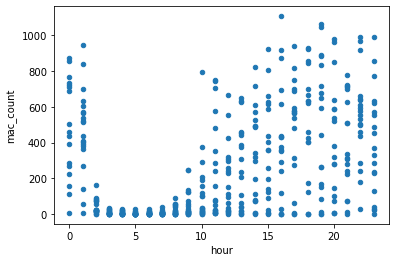

In [21]:
_ = dataset.plot.scatter(x='hour', y='mac_count')

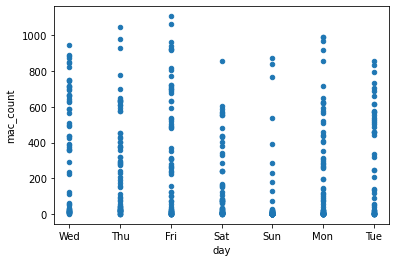

In [22]:
_ = dataset.plot.scatter(x='day', y='mac_count')

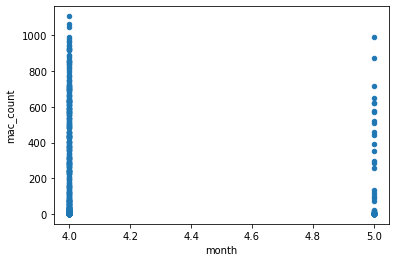

In [23]:
_ = dataset.plot.scatter(x='month', y='mac_count')

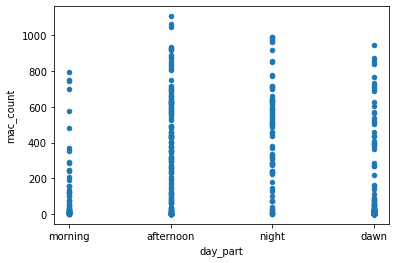

In [24]:
_ = dataset.plot.scatter(x='day_part', y='mac_count')

<AxesSubplot:xlabel='mac_count', ylabel='Count'>

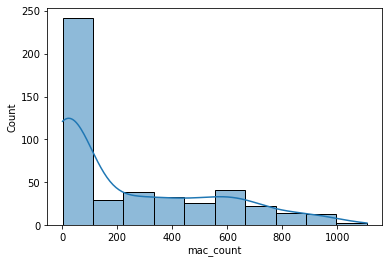

In [25]:
sns.histplot(dataset['mac_count'], kde=True)

<AxesSubplot:xlabel='month', ylabel='Count'>

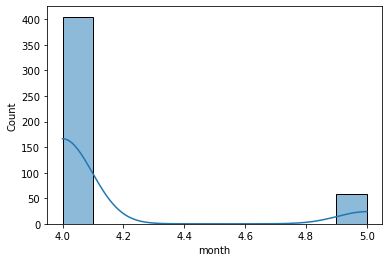

In [26]:
sns.histplot(dataset['month'], kde=True)

<AxesSubplot:xlabel='hour', ylabel='Count'>

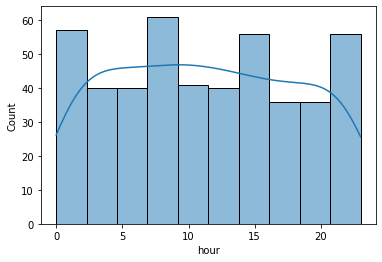

In [27]:
sns.histplot(dataset['hour'], kde=True)

# Preparar os dados para o modelo

In [28]:
#Label encoding dos dados categóricos
le_day = preprocessing.LabelEncoder()
day_encoded = le_day.fit_transform(dataset['day'])
le_day_part = preprocessing.LabelEncoder()
day_part_encoded = le_day_part.fit_transform(dataset['day_part'])
dataset['day'] = day_encoded
dataset['day_part'] = day_part_encoded
dataset

,mac_count,day,hour,month,day_number,day_part,is_holiday_eve
0,2.0,6,9,4,13,2,0
2,28.0,6,10,4,13,2,0
30,51.0,6,11,4,13,2,0
81,64.0,6,12,4,13,0,0
145,233.0,6,13,4,13,0,0
...,...,...,...,...,...,...,...
114982,4.0,5,6,5,3,1,0
114986,5.0,5,7,5,3,1,0
114991,22.0,5,8,5,3,1,0
115013,134.0,5,9,5,3,2,0


In [29]:
X = dataset.values[:,1:]
y = dataset.values[:,0]
y = y.reshape(463,1)
X_shape = X.shape
y_shape = y.shape
print(X[0])
print(y[0])
print('X shape:', X_shape)
print('Y shape:', y_shape)

[6 9 4 13 2 0]
[2.0]
X shape: (463, 6)
Y shape: (463, 1)


## DecisionTree Regressor

In [30]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2022)
print(X_test.shape)

regressor = DecisionTreeRegressor(random_state=2022)

regressor.fit(X_train,y_train)

(93, 6)


DecisionTreeRegressor(random_state=2022)

### Prever o número total de mac addresses

In [31]:
days = [0,1,2,3,4,5,6]
day_parts = [0,1,2,3]
day_name = le_day.inverse_transform(days)
day_part = le_day_part.inverse_transform(day_parts)
print(day_name)
print(day_part)

['Fri' 'Mon' 'Sat' 'Sun' 'Thu' 'Tue' 'Wed']
['afternoon' 'dawn' 'morning' 'night']


In [32]:
y_pred = regressor.predict([[1, 9, 6, 13, 2, 0]])
print('Contagem de mac adresses (aproximada) para o dia 12 de junho, pela manhã (às 9):',int(y_pred))

Contagem de mac adresses (aproximada) para o dia 12 de junho, pela manhã (às 9): 20


In [33]:
y_pred = regressor.predict([[0, 16, 4, 29, 0, 0]])
print('Contagem de mac adresses (aproximada) para o dia 29 de abril, pela tarde (às 16):',int(y_pred))

Contagem de mac adresses (aproximada) para o dia 29 de abril, pela tarde (às 16): 1107


In [34]:
y_pred = regressor.predict([[1, 10, 5, 16, 2, 0]])
print('Contagem de mac adresses (aproximada) para o dia 16 de maio, pela manhã (às 10):',int(y_pred))

Contagem de mac adresses (aproximada) para o dia 16 de maio, pela manhã (às 10): 100


In [35]:
y_pred = regressor.predict(X_test)
print('Mac counts previstos:',y_pred.astype('int'))
print('Mac counts reais:',y_test.astype('int').flatten())

Mac counts previstos: [832 360   5 569   3 637 316 490   1  18 989   7  64  71 310  24   2  29
   1   4   1  79   5 633 269  63  18   2  18  18 752 752 796 239 624 857
  22 269 102 611  24  42  57  42  71   4 206   8  22   8 859   8  14   3
 637 661 279  10 618 536 401 565  24 298 310 644  26   4   5 122  57 172
  71   8  11  14 339 624 555 796 222  29   9 989  14   1 534 920   3 368
 331  14   8]
Mac counts reais: [265 872  12 608   2 319 117 925  20  24 509  17 233   1 256  13   6   5
  58   4   3  94   3 888 401 122   2   1  26  19 714 664 703   2 578 564
  46 689 224 698  54  39 125  19 165  58 456  71   5  49 458   7  18   4
 278 579 638  19 377 980 171 688  25 647 351  27  14   2   1   5 114 149
  17  17  14   1 777 441  26 553 945   1   1 522   3   8 773 815   5 594
 127   3   1]


## Rede neuronal

In [42]:
dataset['day'] = dataset['day'].astype('float32')
dataset['day_part'] = dataset['day_part'].astype('float32')
dataset['month'] = dataset['month'].astype('float32')
dataset['hour'] = dataset['hour'].astype('float32')
dataset['is_holiday_eve'] = dataset['is_holiday_eve'].astype('float32')
dataset['day_number'] = dataset['day_number'].astype('float32')
X = dataset.values[:,1:]
y = dataset.values[:,0]
y = y.reshape(463,1)
print(X[0])
print(y[0])

[ 6.  9.  4. 13.  2.  0.]
[2.]


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [44]:
# Guardar dados para teste
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 2022)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = 2022)
print('Shape do treino:', X_train.shape, y_train.shape)
print('Shape do teste:', X_test.shape, y_test.shape)
print('Shape da validação:', X_val.shape, y_val.shape)

Shape do treino: (333, 6) (333, 1)
Shape do teste: (37, 6) (37, 1)
Shape da validação: (93, 6) (93, 1)


In [45]:
import tensorflow as tf

inputs = tf.keras.Input(shape=X_train.shape[1:])
x = tf.keras.layers.Dense(32, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dense(8, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [46]:
# Compilar o modelo
model.compile(loss = 'mae', optimizer = 'adam', metrics=['mae'])

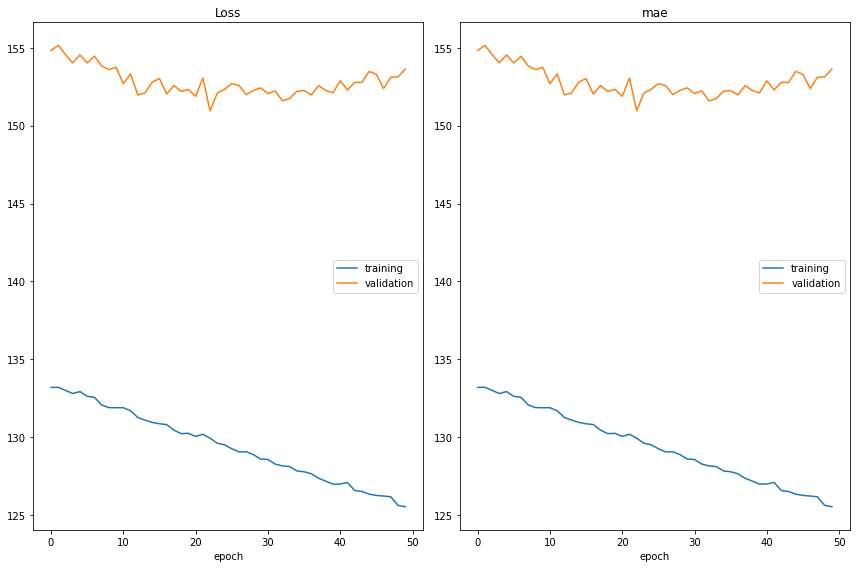

Loss
	training         	 (min:  125.532, max:  133.203, cur:  125.532)
	validation       	 (min:  150.956, max:  155.150, cur:  153.639)
mae
	training         	 (min:  125.532, max:  133.203, cur:  125.532)
	validation       	 (min:  150.956, max:  155.150, cur:  153.639)
3/3 [==============================] - 0s 4ms/step - loss: 148.9555 - mae: 148.9555
Val Score:  [148.95553588867188, 148.95553588867188]




In [47]:
# Fitting do modelo
from livelossplot.tf_keras import PlotLossesCallback

n_folds=3
epochs=50
batch_size=16

def fit_and_evaluate(t_x, val_x, t_y, val_y, epochs, batch_size, model):
    results = model.fit(t_x, t_y, epochs=epochs, batch_size=batch_size, callbacks=[PlotLossesCallback()], 
              verbose=1, validation_split=0.1)  
    print("Val Score: ", model.evaluate(val_x, val_y))
    return results

#save the model history in a list after fitting so that we can plot later
model_history = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    model_history.append(fit_and_evaluate(X_train, X_val, y_train, y_val, epochs, batch_size,model))
    print("======="*12, end="\n\n\n")

In [48]:
preds = model.predict(X_test)
print('Previsões:',preds.flatten())
print('Realidade:',y_test.flatten())

Previsões: [ 5.41002991e+02  3.37929688e+02  1.16290874e+01  3.20271835e+01
  2.00411892e+01  4.66757355e+02  1.08129776e+02  5.40266235e+02
  3.32727776e+01  2.11627750e+01  2.21639557e+01  5.42705566e+02
  1.86422531e+02  2.24392853e+01  2.74093048e+02  4.55942078e+02
 -7.70374089e-02  1.27166176e+01  1.69830284e+01  1.82633324e+01
  5.98457108e+01  9.52460556e+01  1.18115105e+02  5.69265381e+02
  1.08520956e+01  5.64047668e+02  8.86236572e+00  4.04340424e+02
  3.43150055e+02  5.71494818e+00  3.08509918e+02  1.87609692e+01
  3.66466022e+00  4.93370758e+02  3.44295135e+02  5.93406189e+02
  2.82345581e+02]
Realidade: [8.530e+02 2.920e+02 5.000e+00 5.000e+00 3.200e+01 3.080e+02 2.410e+02
 6.610e+02 5.360e+02 2.300e+01 1.000e+00 9.310e+02 1.820e+02 3.000e+00
 7.530e+02 1.720e+02 1.700e+01 1.000e+00 3.000e+01 2.690e+02 1.220e+02
 3.000e+00 3.700e+01 4.010e+02 3.000e+00 9.890e+02 1.000e+00 6.150e+02
 5.690e+02 6.000e+00 7.190e+02 3.000e+00 1.800e+01 2.880e+02 6.270e+02
 1.045e+03 4.240e+02